Word is here : https://aristotleuniversity-my.sharepoint.com/:w:/g/personal/evangepc_office365_auth_gr/EUWFoaFu3fRErFQrheXT3ygBjCLoK6BL1Wb1o1UJTq3yjA?e=ReV2Sg

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import datasets
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
import numpy
from sklearn import neighbors, metrics

Load the dataset mnist from keras datasets library

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

Visualise the data

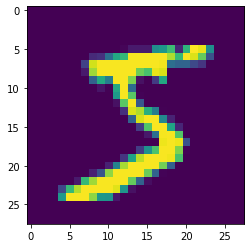

In [3]:
plt.imshow(x_train[0])
plt.show()

Normalize the data 

In [4]:
x_train = tf.reshape(x_train/255, [60000,-1])
x_test =  tf.reshape(x_test/255, [10000,-1])
x_test.shape

TensorShape([10000, 784])

Run KNeighborsClassifier from sklearn library

K = 1

In [5]:
clf = neighbors.KNeighborsClassifier(1).fit(x_train,  y_train)
y_pred = clf.predict(x_test)  #Predict the class labels for the provided data.
metrics.accuracy_score(y_test, y_pred)

0.9691

K = 3

In [6]:
clf = neighbors.KNeighborsClassifier(3).fit(x_train,  y_train)
y_pred = clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.9705

Let's create the model :

In [7]:
batch_size = 32

#Firstly need to create the architecture for my neural network
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(128, activation='tanh'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Secondly compile my model
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = keras.optimizers.Nadam(learning_rate = 0.0003),
    metrics=["accuracy"],
)

#With method fit my model start the training
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = 25, verbose = 2)

Epoch 1/25
1875/1875 - 4s - loss: 0.3960 - accuracy: 0.8943 - 4s/epoch - 2ms/step
Epoch 2/25
1875/1875 - 3s - loss: 0.1946 - accuracy: 0.9449 - 3s/epoch - 2ms/step
Epoch 3/25
1875/1875 - 3s - loss: 0.1459 - accuracy: 0.9587 - 3s/epoch - 2ms/step
Epoch 4/25
1875/1875 - 3s - loss: 0.1168 - accuracy: 0.9670 - 3s/epoch - 2ms/step
Epoch 5/25
1875/1875 - 3s - loss: 0.0963 - accuracy: 0.9721 - 3s/epoch - 2ms/step
Epoch 6/25
1875/1875 - 3s - loss: 0.0808 - accuracy: 0.9768 - 3s/epoch - 2ms/step
Epoch 7/25
1875/1875 - 3s - loss: 0.0689 - accuracy: 0.9808 - 3s/epoch - 2ms/step
Epoch 8/25
1875/1875 - 3s - loss: 0.0596 - accuracy: 0.9833 - 3s/epoch - 2ms/step
Epoch 9/25
1875/1875 - 3s - loss: 0.0516 - accuracy: 0.9858 - 3s/epoch - 2ms/step
Epoch 10/25
1875/1875 - 3s - loss: 0.0450 - accuracy: 0.9877 - 3s/epoch - 2ms/step
Epoch 11/25
1875/1875 - 3s - loss: 0.0395 - accuracy: 0.9893 - 3s/epoch - 2ms/step
Epoch 12/25
1875/1875 - 3s - loss: 0.0351 - accuracy: 0.9904 - 3s/epoch - 2ms/step
Epoch 13/25
1

Train accuracy :

In [8]:
model.evaluate(x_train, y_train, verbose = 2)

1875/1875 - 2s - loss: 0.0104 - accuracy: 0.9974 - 2s/epoch - 1ms/step


[0.010359188541769981, 0.9973666667938232]

Test accuracy :

In [9]:
model.evaluate(x_test, y_test, verbose = 2)

313/313 - 1s - loss: 0.0934 - accuracy: 0.9762 - 713ms/epoch - 2ms/step


[0.0933929979801178, 0.9761999845504761]

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


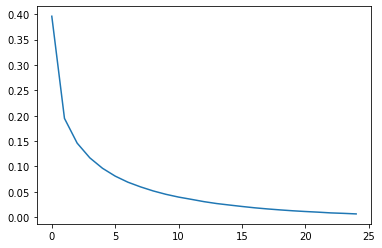

In [11]:
plt.plot(history.history['loss'])

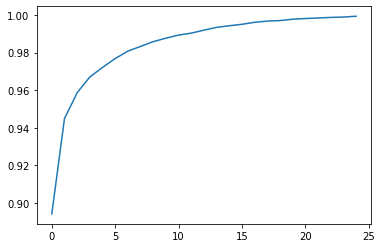

In [12]:
plt.plot(history.history['accuracy'])